# **Best Pittsburgh Neighborhood to Live In for Broke College Students/Recent Grads**

*Margo Brown, Ruby Heath, Abigail Koss*

### Introduction
For our project, we decided to focus our study on something relevant and interesting to us. So, we started by each selecting our own metric we cared about and finding a category that encompassed each element. After considering some options, we settled on rating Pittsburgh neighborhoods by their liveability for broke young adults. Some other options we explored were safest neighborhood to walk in at night and best neighborhood to live in with young children. However, we settled on our topic because the three data sets that applied to this topic were the most dense and detailed. 

### The Metric
Our metric was easy to decide on as it is both relevant and could apply given the data sets we initially were each drawn to. Abigail focused on number of local parks, the better score being the higher number of parks. Time in the outdoors is very important for people under stress for both their physical and mental healh. Thus, an area with more parks would be more attractive to a college student or recent graduate student (assuming the majority of this demographic has higher relative stress). Margo's data set was the list of arrest incidents in the city of Pittsburgh including offense. She decided to focus specifically on theft as areas with higher rates of theft would be less affordable for someone who couldn't replace their belongings. Finally, Ruby focused on access to local facilities that pertain to needs and wants of residents (public pools, fire stations, etc.). Local access to these amenities is highly desireable for students or young adults due to limited funds, inconsistent access to personal transporation, and general convenience.

## Abigail's Metric: Number of Parks in Pittsburgh Neighborhoods
**Metric:** In this case, the neighborhoods with the most parks would be considered best. To measure this, I found the City Parks dataset, which lists all of the parks in the city of Pittsburgh and where they are located.

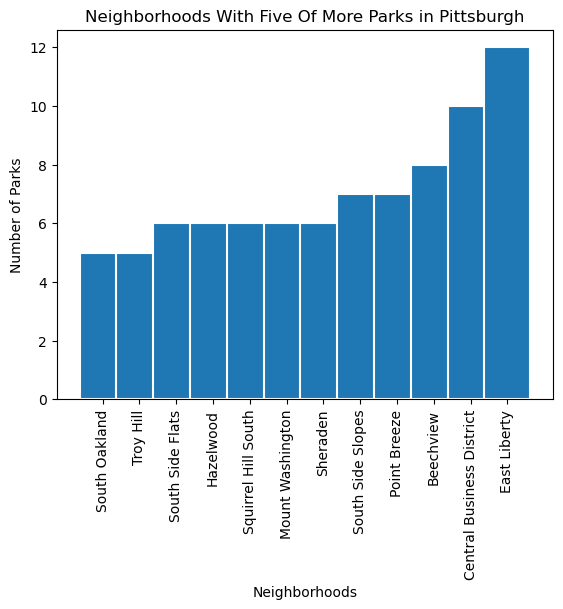

In [8]:
import pandas as pd

# reads data base
parks = pd.read_csv("CityParks.tsv", sep="\t")

# makes a dictionary that keeps track
# of how parks are in each neighborhood

parks_dict = {}

for i, row in parks.iterrows():
    if row['neighborhood'] in parks_dict:
        parks_dict[row['neighborhood']] += 1
    else:
        parks_dict[row['neighborhood']] = 1
        
# sorts dictionary into accending order
parks_sorted = dict(sorted(parks_dict.items(), key=lambda item: item[1]))

# creating a bar graph
import matplotlib.pyplot as plt

x = []
y = []

# adds neighborhoods with 5 or more parks to x and y axis
for key in parks_sorted:
    
    if parks_sorted[key] >=5:
        x.append(key)
        y.append(parks_sorted[key])

# ploting the graph
fig, ax = plt.subplots()

ax.bar(x, y, 
       width=1.25, edgecolor="white", linewidth=1.5)
plt.xticks(rotation='vertical') 

plt.xlabel('Neighborhoods')
plt.ylabel('Number of Parks')
plt.title('Neighborhoods With Five Of More Parks in Pittsburgh')

plt.show()

### The Best Neighborhood
Based on the data East Liberty is the neighborhood with the most parks, coming in with 12 parks total. The Central Business District, more commonly referred to as downtown Pittsburgh is a close second with 10 parks total. Both of these neighborhoods have plenty of parks along with other sights and activities.

### Conclusion:
I haven't been to East Liberty but it seems like a great neighborhood. Obviously, there are plenty of parks, but looking at the map it seems like there is lots to do and see in general there. My personal favorite neighborhoods are Shadyside and Squirrel Hill because they are close by and fun to explore. From what I've learned East Liberty I think I would enjoy my time in East Liberty and it may even become a new favorite of mine once i get the chance to v

## Margo's Metric: Theft and Theft-Related Arrests since 2005 in Pittsburgh Neighborhoods
**Metric:** The lower the number of theft-related arrest incidents in the neighborhood, the better the neighborhood is considered in my measure.

<function matplotlib.pyplot.show(close=None, block=None)>

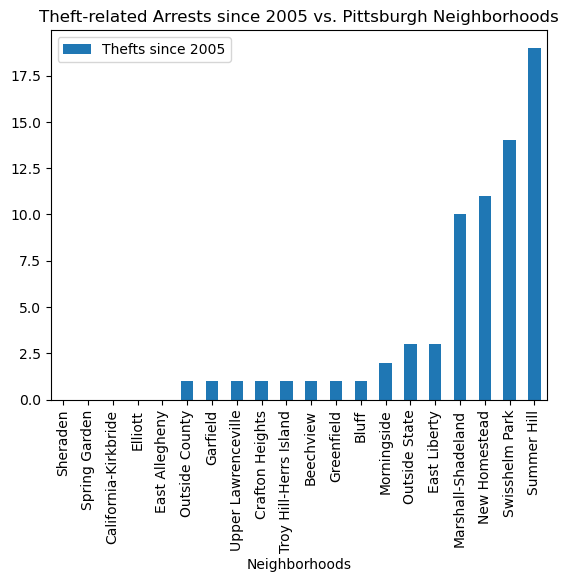

In [9]:
#Retrieval of Data
import pandas as pd
arrest_report = pd.read_csv("arrest-incidents.tsv", sep="\t")

neighborhoods = []
theft_count = []

offense_query_mask = arrest_report['OFFENSES'].str.contains('Theft')

for n in arrest_report['INCIDENTNEIGHBORHOOD'].unique():
    neighborhoods.append(n)
    name_query_mask = arrest_report['INCIDENTNEIGHBORHOOD'] == n
    theft_count.append(len(arrest_report[name_query_mask & offense_query_mask]))

#x and y have minimum 20 neighborhoods
X = []
Y = []

index = 0

while index < 21:
    min_value = min(theft_count)
    min_neighborhood = neighborhoods[theft_count.index(min_value)]

    if index != 0: #the first element attempted to add is 'nan' which implies an unspecified neighborhood, which is not relevant to our overall measure
        Y.append(min_value)
        X.append(min_neighborhood)

    theft_count.remove(min_value)
    neighborhoods.remove(min_neighborhood)
    
    index+=1

#Graph Production
import matplotlib.pyplot as plt

data = pd.DataFrame({'Neighborhoods': X, 'Thefts since 2005': Y})

data.plot.bar(x='Neighborhoods', y='Thefts since 2005')
plt.title('Theft-related Arrests since 2005 vs. Pittsburgh Neighborhoods')

plt.show

### Conclusion

Based on this measure, Sheraden, Spring Garden, California-Kirkbride, Elliott, and East Allegheny are ideal, all having 0 incidences of theft-based arrests since 2005.

My personal favorite neighborhood is either Shadyside because I feel safe when I am there and there are lots of places to shop or North Oakland because the houses and environment is very pretty to walk through. However, as printed before, these each have higher incidences of theft-based arrests. This is likely due to the higher population and higher average income of residents in each of these neighborhoods. As a result, they are more likely to be targets of theft, especially burglary.

## Ruby's Metric: Number of City Facilities in Pittsburgh Neighborhoods
**Metric:** My dataset deals with the city facilities in Pittsburgh such as, fire stations, pools, and rec centers. This would be useful for our metric because it highlights neighborhoods with the best access to essential amenities, recreational opportunities, and safety resources. The neighborhood with the most city facilities will be considered the "best".

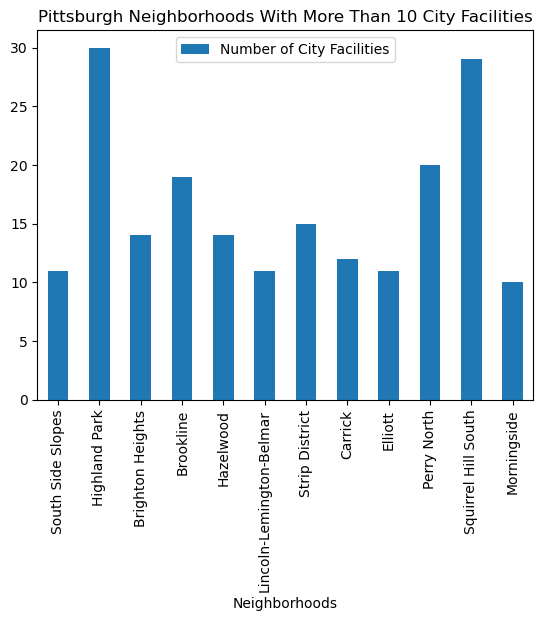

Highland Park:  30
Squirrel Hill South:  29


In [11]:
import pandas as pd

#Read the dataset
facilities = pd.read_csv("city_facilities.tsv", sep = "\t")

#Create a dictionary with all the neighborhoods and how many facilities they have

facilities_dict = {}

for i, row in facilities.iterrows():
    if row['neighborhood'] in facilities_dict:
        facilities_dict[row['neighborhood']] += 1
    else:
        facilities_dict[row['neighborhood']] = 1
        
#Making a Vertical Bar Graph
import matplotlib.pyplot as plt

x = []
y = []

#Only adding neighborhoods with 10 or more facilities to make the graph easier to read
for num in facilities_dict:
    if facilities_dict[num] >= 10:
        x.append(num)
        y.append(facilities_dict[num])

#Plotting the data
data = pd.DataFrame({'Neighborhoods': x, 'Number of City Facilities': y})
data.plot.bar(x = 'Neighborhoods', y = 'Number of City Facilities')
plt.title('Pittsburgh Neighborhoods With More Than 10 City Facilities')

plt.show()

print("Highland Park: ", facilities_dict["Highland Park"])
print("Squirrel Hill South: ", facilities_dict["Squirrel Hill South"])

### Best Neighborhood

Based on the graph, Highland Park has the most city facilities with 30 facilities total. Squirrel Hill South is in second but only one away with 29 facilities. Therefore, either of these neighborhoods would be ideal to live in.

### Conclusion

Although I haven't been to many neighborhoods in Pittsburgh, I have been to Squirrel Hill and as of now it is my favorite so it is nice to see it so highly ranked in my data. I like Squirrel Hill because of how many things are in the area.

## Best Pittsburgh Neighborhood


**Front-Runners from each Individual Metric** 

*Parks:* East Liberty, Downtown Pittsburgh (Central Business District)

*Theft:* Sheraden, Spring Garden, California-Kirkbride, Elliott, and East Allegheny

*Amenities:* Highland Park, Squirrel Hill